Saving Housing.csv to Housing (1).csv
Mean Squared Error (MSE): 1324506.96
R² Score: 0.65
Root Mean Squared Error (RMSE): 1150.87
Mean Absolute Error (MAE): 970043.40


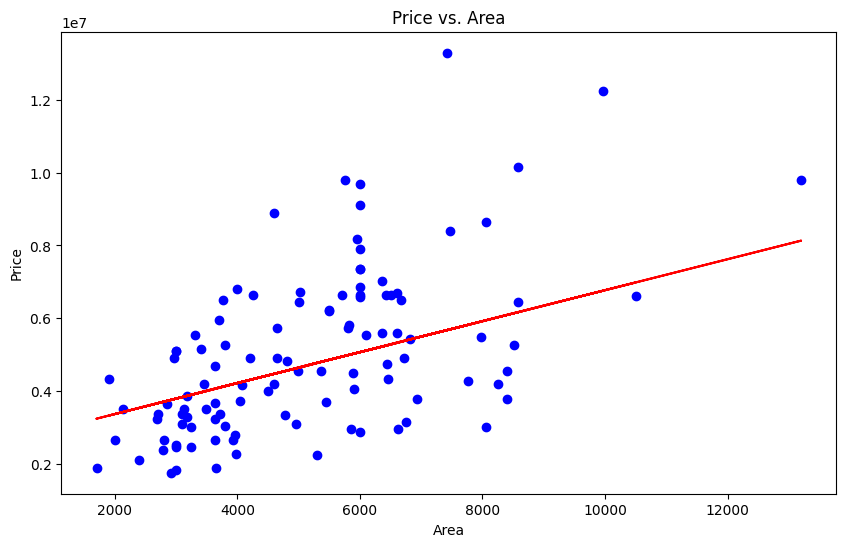

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from google.colab import files
uploaded = files.upload()
data=pd.read_csv('Housing.csv')
x = data.drop(['price'],axis=1)
y = data['price']


categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
mse = np.sqrt( mean_squared_error( y_test, y_pred ))
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


X_area = data[['area']]
y_price = data['price']
model_area = LinearRegression()
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_price, test_size=0.2, random_state=42)
model_area.fit(X_train_area, y_train_area)
y_pred_area = model_area.predict(X_test_area)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_area, y_test_area, color='blue')
plt.plot(X_test_area, y_pred_area, color='red')
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()